# Tinkering Notebook for Lecture 7 - Policy Gradient

# Table of content
* ### [1. Introduction <a id="intro">](#sec1)
* ### [2. Imports <a id="imports">](#sec2)
* ### [3. REINFORCE: Monte-Carlo Policy Gradient <a id="reinforce"> ](#sec3)
 * #### [3.1 Introduction](#sec3_1)
 * #### [3.2 Run the agent](#sec3_2)
 * #### [3.3 Discussions ](#sec3_3)
* ### [4. REINFORCE with Baseline](#sec4)
 * #### [4.1 Introduction](#sec4_1)
 * #### [4.2 Run the agent](#sec4_2)
 * #### [4.3 Discussions](#sec4_3)
* ### [5. Actor-Critic Methods<a id="ac">](#sec5)
 * #### [5.1 Introduction ](#sec5_1)
 * #### [5.2 Run the agent](#sec5_2)
 * #### [5.3 Discussions](#sec5_3)


# 1. Introduction <a id="intro"> <a id="sec1">



References to examples, figures and pages are to the Reinforcement Learning book by Sutton and Barto.

This notebook focuses on policy gradient methods. We will implement Reinforce (page 328), Reinforce with Baseline (page 330) and one-step Actor-Critic (page332) and run these on the short corridor environment of Example 13.1. 
    
Note that in this notebook we do not perform averaging over runs,  hence we typically have considerable amount of randomness in our results. This makes it difficult to draw general conclusions about the effect of parameters, especially with Monte-Carlo methods. You may want to perform averaging over runs after your initial experiments. 

__Short Corridor Environment:__ If you haven't installed `gym-RLcourse` before,  you need to install it in order to use the short corridor environment:

```bash
git clone https://github.com/ozayca/gym-RLcourse.git
cd gym-RLcourse
pip3 install -e .
```

__Note on Code Completition Tasks__: These tasks are tagged with TODO-STD within the code. The explanation for these taks are given in the text just before the associated code. There are also related small tasks,  see for instance R1 just before R2. These small tasks  are designed to help you to understand the crucial concepts and variables/methods.  In most cases, it is not possible to perform the code completion task without understanding these concepts/variables. Please do not try to skip these small tasks! 

# 2. Imports <a id="imports"> <a id="sec2">

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import gym_RLcourse

Let's create a short corridor: 

In [2]:
env = gym.make('ShortCorridor-v0')
print('State space:', env.observation_space)
print('Action space:', env.action_space)

State space: Discrete(4)
Action space: Discrete(2)


__Short corridor with switched actions:__ In the short corridor environment,  there are 3 non-terminal states. The available actions are one-step left and one-step right. The reward is -1 per step. The result of actions are reversed in the second state from the left. Please see Example 13.1 for details.  

Let's make a basic check on our installation for the corridor environment. When you run the code, you will see 3 non-terminal states and  a terminal goal state on the right (`G`). Agent's location is indicated by `x` which is always at the left-most position at initialization. Other states are marked with `o`.


In [3]:
env.render()

x  o  o  G



# 3. REINFORCE: Monte-Carlo Policy Gradient <a id="reinforce">  <a id="sec3">

## 3.1 Introduction <a id="sec3_1">


    
We now implement the REINFORCE: Monte-Carlo Policy-Gradient Control for Example 13.1
  
The class `PolicyGradient` can be called to run either plain REINFORCE (page 328)  or REINFORCE with baseline (page 330). This is determined by  `flag_with_baseline`. If flag_with_baseline is 1, REINFORCE with the baseline is called. Otherwise, we have  plain REINFORCE (page 328). 

We now focus on plain REINFORCE.
    
The following may help you to see the correspondence between the code and the algorithm in the book more easily:   
    
- You can read about the   `softmax()` function here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.softmax.html
    
- Our code implements the policy parametrization given by Eqn 13.2 and 13.3, see `policy()` method. 
    
- The variable `alpha_theta` corresponds to $\alpha$ on REINFORCE (page 328). For clarity and to be consistent with the later version with baseline,  it is named as alpha_theta.  
      
- Note the following: i) the features for policy parametrization from Example 13.1 are hard-coded , ii) the value function parametrization is hard-coded as on Page 331. Note that none of these are state-dependent.
    
__Task-R1:__  If you haven't already done while studying the subject, verify Eqn. 13.9. __IMPORTANT__ We use this relation for the update of $\theta$. 
    
__Task-R2:__ For `flag_with_baseline=0`, complete the method  `learn()` using  plain REINFORCE (page 328).

In [18]:
class PolicyGradient:

    def __init__(self, gamma=1, alpha_theta=(2.0**-13), flag_with_baseline=0, alpha_w=(2.0**-6)):
        self.gamma = gamma
        self.alpha_theta = alpha_theta
        self.actions = range(2)  # 0: left, 1: right
        # features: first column : x(s,left) =[0,1], second column x(s,right) = [1,0]
        self.features = np.array([[0, 1], [1, 0]]) 
        self.theta = [-1.47, +1.47]  # start close to epsilon-greedy left, see Example 13.1
        self.flag_with_baseline = 0
        if flag_with_baseline == 1:
            self.flag_with_baseline = 1
            self.alpha_w = alpha_w
            self.w = 0.0

    def policy(self, state):
        h = np.dot(self.theta, self.features)  # features are not dependent on the state, see Example 13.1
        return softmax(h)

    def act(self, state): # agent chooses its action according to the probability distribution provided by the policy
        action = np.random.choice(self.actions, p=self.policy(state))
        return action

    def valueFunc(self, state):
        return self.w  # This is a  value function parametrization specialized for Example 13.1, see page 331

    def learn(self, states, actions, rewards):
        # TODO-STD Using the arrays of states, actions, rewards, write the code for the following: 
        # Task-R2: if self.flag_with_baseline == 0, the last three lines of REINFORCE on page 308 is executed.
        # Task-RB1:  if self.flag_with_baseline == 1, the the last five lines of REINFORCE  on page 330 is executed. 
        # NOTES:
        # -- To experiment with plain REINFORCE (without baseline), you do not need to complete Task-RB1! 
        #    You can just complete Task-R2 and call the agent with the option flag_with_baseline=0
        # -- Make sure that your solution updates self.theta for Task-R2;  and self.theta and self.w for Task-RB1
        # -- Note about indexing:  
        # The train() function will follow the indexing in the book. 
        # Hence, S_t, A_t, R_t+1 are at the indices t, t, t+1 in their respective arrays.

        T = len(states) - 1 #   
        G = 0 #   
        GA = np.zeros((T, 1)) #   
        for t in reversed(range(T)): #   
            G = self.gamma * G + rewards[t + 1]  # G_t #   
            GA[t] = G #   
        for t in range(T): #   
            G = GA[t] #   
            action = actions[t] #   
            state = states[t] #   
            if self.flag_with_baseline == 1:  
                delta = G - self.valueFunc(state) #   #....
                gradient_w = 1 #   
                delta_w = self.alpha_w * delta * gradient_w #   
                self.w += delta_w #   
                D = delta #   
            else: 
                D = G #   #.... 
            gradient_theta = self.features[:, action] - np.dot(self.features, self.policy(state))  # see Eqn. 13.9 #     
            delta_theta = self.alpha_theta * np.power(self.gamma, t) * D * gradient_theta #   
            self.theta += delta_theta #     

## 3.2 Run the agent <a id="sec3_2">



We first introduce `train` function for ease of experimentation. Note that the function returns the array `total_reward_episodes` which provides the sum of rewards in episode $i$ at index $i$. We will use this variable to track the behaviour of the agent. 

In [19]:
def train(env, agent, nEpisode):
    total_reward_episodes = np.zeros(nEpisode)
    max_nStep = 1000
    for iEpisode in range(nEpisode):
        if iEpisode % 100 == 0: 
            print('Episode', iEpisode)
        done = False
        t = 0
        T = np.inf
        state = env.reset()
        action = agent.act(state)
        actionA = [action]
        stateA = [state]
        rewardA = [0]
        while not done:
            if t < T:
                state, reward, done, info = env.step(action)
                rewardA.append(reward)
                stateA.append(state)
                action = agent.act(state)
                actionA.append(action)
                if done:
                    T = t + 1
            t += 1
            if t > max_nStep:
                done = True
        agent.learn(stateA, actionA, rewardA)
        total_reward_episodes[iEpisode] = np.sum(rewardA)
    return (total_reward_episodes)

In [20]:
def plotTotalRewardEpisodes(total_reward_episodes, alg_label):
    plt.axhline(y=-11.6, color='y', linestyle='-.', label='v*(s0)')
    plt.plot(total_reward_episodes, label= alg_label) 
    plt.xlabel('Episode')
    plt.ylabel('G')
    plt.legend(loc='best')
    plt.ylim(-100, 0)
    plt.grid(True)
    plt.show()

We now create the short corridor environment of Example 13.1 and create the REINFORCE agent (without baseline). 

__Task-SC:__ What is optimal strategy in Short Corridor if you are allowed to form a state-dependent strategy? 

In [21]:
env = gym.make('ShortCorridor-v0')
agent = PolicyGradient(gamma=1.0, alpha_theta=2**(-13), flag_with_baseline=0)

Note that the policy is not state dependent, hence action probabilities are the same for all states. Let's look at the initial policy. The policy is written as: (probability(left), probability(right)). You should see values close to those of $\epsilon$-greedy left, see the figure of Example 13.1.  

In [22]:
print(agent.policy(state=0))

[0.94978873 0.05021127]


We now run the agent on the environment. Wait until the agent's final policy is printed. 

In [23]:
total_reward_episodes = train(env, agent, nEpisode =1000)
print(agent.policy(state=0))

Episode 0
Episode 100
Episode 200
Episode 300
Episode 400
Episode 500
Episode 600
Episode 700
Episode 800
Episode 900
[0.5068172 0.4931828]


We plot the reward function.  

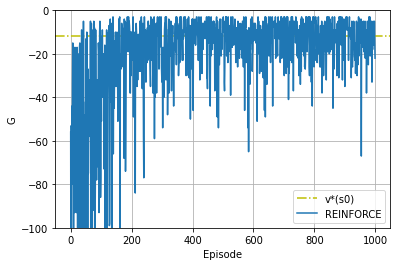

In [24]:
plotTotalRewardEpisodes(total_reward_episodes, 'REINFORCE')

## 3.3 Discussions  <a id="sec3_3">





__Task-RD1:__ The optimal policy  is choosing *right*  with probability $\approx 0.59$, which achieves a value of $v_*\approx -11.6$.  Re-run the above cells a few times so that the agent and environment is reset. (i.e. start again from the cell that calls `gym.make()`). At each time, check the following: Is the agent's policy close to the optimal value policy? Is the return close to $v_*$? You may have observed that the return is fairly close to the optimal value but the policy is not close to this optimal value (in the sense that probability of choosing *right* is not close to  $0.59$).  Check the plot in Example 13.1 to understand what is going on. 

__Task-RD2:__ The learning parameter `alpha_theta` was chosen using Figure 13.1. Change it and try to determine how it  affects the results. It may be interesting to choose values in the range $2^{(-10)} - 2^{(-13)}$. Note that some of these runs may take an extraordinarily long time. Why do you think this is the case? See also the discussions below. 

__Task-RD3:__ Similar to Figure 13.1,  we now provide the average performance over $300$ runs. Compare these results  with Figure 13.1 and your observations. 

<center><img src="figures/fig_reinforceall.png" height=300></center>

Looking at the variance of the performance over different runs can be helpful. In the below figures, we indicate the standard deviation over the runs with a gray area on the plots. More precisely, we plot as follows: the blue curve gives the *mean* of the total reward over runs  (hence this curve is the same with the corresponding curve in the above figure). We also color the area between *mean-standard deviation* and *mean+standard deviation* with light gray.  To make the plots easier to read, we have done the following: standard deviation is smoothed along episode index axis and capped with $100$. 

<table><tr><td><img src="figures/fig_reinforce_alpha2p-12.png" height=300 ></td><td><img src="figures/fig_reinforce_alpha2p-13.png"  height=300></td><td><img src="figures/fig_reinforce_alpha2p-14.png"  height=300></td></tr></table>


__Task-RD4:__ Consider the function `softmax()` which takes a vector and returns a vector of exponential of each element divided by the sum of the exponentials of all the elements. The implementation details of this function can heavily affect the emprical performance of the algorithms. A straightforward implementation would be the following: 

    softmax(x) = np.exp(x)/sum(np.exp(x))

On the other hand, in the scipy library it is implemented as: 

    softmax(x) = np.exp(x - logsumexp(x))
    
Are these two forms equivalent? Why do you think the second form is prefered? How would the results change if the first form were used?     
    

# 4. REINFORCE with Baseline <a id="sec4">

## 4.1 Introduction <a id="sec4_1">



We now consider the REINFORCE with Baseline (episodic) (page 330). 

__Task-RB1:__ In  `PolicyGradient()` provided in the beginning of the notebook, complete the code task tagged as Task-RB1. 



## 4.2 Run the agent <a id="sec4_2">

Once you have performed the above task, we run the experiment and plot the total reward versus episodes. The step sizes `alpha_theta` and `alpha_w` are chosen using Figure 13.2. 

In [25]:
env = gym.make('ShortCorridor-v0')
agent = PolicyGradient(gamma=1.0, alpha_theta=2**(-9), flag_with_baseline=1, alpha_w=(2.0**-6))
total_reward_episodes = train(env, agent, nEpisode =1000)
print(agent.policy(state=0))

Episode 0
Episode 100
Episode 200
Episode 300
Episode 400
Episode 500
Episode 600
Episode 700
Episode 800
Episode 900
[0.42234872 0.57765128]


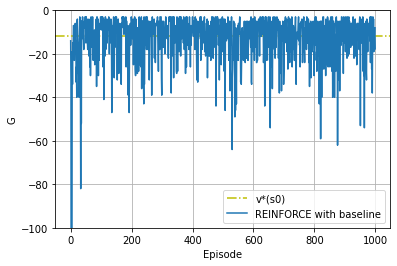

In [26]:
plotTotalRewardEpisodes(total_reward_episodes, 'REINFORCE with baseline')

## 4.3 Discussions <a id="sec4_3">



__Task-RBD1:__ Experiment with different step sizes. With well chosen parameters, we expect REINFORCE with baseline to learn faster compared to the plain REINFORCE. Are your observations consistent with this expectation? 

__Task-RBD2:__ We now provide the average performance of REINFORCE with baseline over $300$ runs. We used the following parameters: `alpha_theta=2**(-9), alpha_w=(2.0**-6)`. Similar to the plots before, gray areas indicate the variations based on the standard deviation and processed in the same manner. Compare these results  with Figure 13.2 and your observations.

<center><img src="figures/fig_reinforceWithBaseline_alpha2p-9.png" height=300></center>

Based on these plots, your observations and your theoratical knowledge about these methods, compare plain REINFORCE and REINFORCE with baseline. Which one would you prefer to use?

# 5. Actor-Critic Methods<a id="ac"> <a id="sec5">

## 5.1 Introduction  <a id="sec5_1">



We now consider one-step Actor-Critic (episodic) on Page 332. We will now have a critic who will guide the learning based on how well it thinks the agent is doing. The critic here is a value function approximator.  

We implement this method for Example 13.1 using the same policy parametrization  provided for Monte-Carlo methods.  

__Task-AC1:__ For the state-value function parametrization, we use the canonical basis in the R^3. Check initialization of `self.features_value`  and the method `valueFunc` to understand how we have parametrized the value function. 

__Task-AC2:__ Complete the `learn` method using one-step Actor-Critic on page 332. 

__Task-AC3:__ Compare REINFORCE with baseline with one-step Actor-Critic. In which way, these methods are different/similar?

In [ ]:
#One-step Actor-Critic Episodic for estimating optimal policy, pg332 from Sutton, Barto
class ActorCritic:

    def __init__(self, gamma=1, alpha_theta=2**-12, alpha_w=2**-4):
        self.gamma = gamma
        self.alpha_theta = alpha_theta
        self.actions = range(2)
        # features for the policy: first column : x(s,left) =[0,1], second column x(s,right) = [1,0]
        self.features = np.array([[0, 1], [1, 0]]) 
        self.theta = [-1.47, 1.47]  # start close to epsilon-greedy left, see Example 13.1
        self.gamma_power = 1  # I from pg332
        self.alpha_w = alpha_w
        self.w = [ 0, 0, 0]
        # features for the value function approximation
        self.features_value = np.array([[1, 0, 0], [0, 1, 0],[0, 0, 1]]) 

    def policy(self, state):
        h = np.dot(self.theta, self.features)  # features are not dependent on the state, as in Example 13.1
        return softmax(h)

    def act(self, state):
        action = np.random.choice(self.actions, p=self.policy(state))
        return action

    def valueFunc(self, state): # calculates \hat{v}(state,w) (when the features are the canonical basis as in self.features_value)
        return self.w[state]


    def learn(self, state, action, state_next, reward, flag_state_next_terminal):
        # TODO-STD write the code for the following: 
        # Task-AC2: Implement one-step Actor-Critic on page 332.
        # NOTES:
        # Make sure that your code updates  self.w, self.theta and self.gamma_power (representing I from pg332)
        # -- Note that flag_state_next_terminal=1 if next state is terminal

         
            
        
            
        
        # w-update  
         #....
        
        
        # theta-update
         #....
         
         
        # self.gamma_power update
         #....


## 5.2 Run the agent <a id="sec5_2">



We now introduce `train_onestep` function for ease of experimentation. Again, the function returns the array `total_reward_episodes` which provides the sum of rewards in episode $i$ at index $i$. We will use this variable to track the behaviour of the agent. 

__Task-ACT:__ The `train_onestep` function for this Actor-Critic is different from the `train` function for the Monte-Carlo methods. Explain how they are different. 

In [ ]:
def train_onestep(env, agent, nEpisode):
    total_reward_episodes = np.zeros(nEpisode)
    max_nStep = 1000  
    for iEpisode in range(nEpisode):
        if iEpisode % 100 == 0: 
            print('Episode', iEpisode)
        done = False
        t = 0
        T = np.inf
        state = env.reset()
        action = agent.act(state)
        actionA = [action]
        stateA = [state]
        rewardA = [0]
        while not done:
            if t < T:
                state_past = state
                state, reward, done, info = env.step(action)
                agent.learn(state_past, action, state, reward, done)
                rewardA.append(reward)
                stateA.append(state)
                action = agent.act(state)
                actionA.append(action)
                if done:
                    T = t + 1
            t += 1
            if t > max_nStep:
                done = True
        total_reward_episodes[iEpisode] = np.sum(rewardA)
    return (total_reward_episodes)

We now run the experiment and plot the total reward versus episodes. Wait until you see the policy printed. 

In [ ]:
env = gym.make('ShortCorridor-v0')
agent = ActorCritic(gamma=1, alpha_theta=2**(-12), alpha_w=(2.0**-4)) 
total_reward_episodes = train_onestep(env, agent, nEpisode =1000)
print(agent.policy(state=0))

In [ ]:
plotTotalRewardEpisodes(total_reward_episodes, 'Actor-Critic')

## 5.3 Discussions <a id="sec5_3">



__Task-RBD1:__ Experiment with different step sizes. Compare the performance with that of REINFORCE variants.

__Task-RBD2:__ We now provide the average performance of one step Actor-Critic over $300$ runs. We used the following parameters: `alpha_theta=2**(-12), alpha_w=(2.0**-2)`. Similar to the plots before, gray areas indicate the variations based on the standard deviation and processed in the same manner. Compare these with the plots for REINFORCE variants.

<center><img src="figures/fig_AC_alphatheta_2p-12_alphaw_2p-2.png" height=300></center>


